<a href="https://colab.research.google.com/github/EugeneHsiung/datasci_5_statistics/blob/main/datasci_5_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import packages**

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols

# **Chi Sqaure**

Is there a relationship between HHA and PMD?

In [2]:
# Read in the data
df = pd.read_csv('Order and Referring.csv')
df

,NPI,LAST_NAME,FIRST_NAME,PARTB,DME,HHA,PMD
0,1558467555,.MCINDOE,THOMAS,Y,Y,Y,Y
1,1417051921,A BELLE,N,Y,Y,Y,Y
2,1972040137,A NOVOTNY,ELIZABETH,Y,Y,Y,Y
3,1760465553,A SATTAR,MUHAMMAD,Y,Y,Y,Y
4,1295400745,A'NEAL,BROGAN,Y,Y,N,N
...,...,...,...,...,...,...,...
1798884,1336502301,ZYZO,JOHN,Y,Y,Y,N
1798885,1225502768,ZZIWA,JACKIE,N,Y,N,Y
1798886,1124277249,ZZIWA-KABENGE,IRYNE,Y,Y,Y,Y
1798887,1033160296,ZZIWAMBAZZA,NATHAN,Y,Y,Y,Y


In [7]:
#value counts of HHA and PMD
df['HHA'].value_counts()      #HHA: Home Health Agency
df['PMD'].value_counts()      #PMD: Power Mobility Devices

Y    1487883
N     311006
Name: PMD, dtype: int64

In [4]:
contingency_table = pd.crosstab(df['PMD'], df['HHA'])
print(contingency_table)

HHA       N        Y
PMD                 
N    167986   143020
Y     35335  1452548


In [6]:
# Chi square test
chi2, p, expected, degreesoffreedom = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")
print(f"expected: {expected}")
print(f"degreesoffreedom: {degreesoffreedom}")

Chi2 value: 684218.8366913624
P-value: 0.0
expected: 1
degreesoffreedom: [[  35151.72471787  275854.27528213]
 [ 168169.27528213 1319713.72471787]]


# Is there a relationship between HHA and PMD?
####**Null Hypothesis (H0)**: There is no relationship between HHA and PMD.
####**Hypothesis1 (H1**): There is a relationship between HHA and PMD.

#### **Results**: The P value is 0 which is smaller than 0.05 meaning there is a relationship between HHA and PMD. H0 would be rejected.  

# **T- Test**

In [29]:
# Read in the data
df = pd.read_csv('Medicare_Telehealth_Trends_Q1_2023.csv')
df.head(30)

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2023,1,Alabama,All,All,All,Aged,All,All,272828.0,338844.0,17353.0,0.0636
1,2023,1,Alabama,All,All,All,All,0-64,All,40304.0,57509.0,4916.0,0.1220
2,2023,1,Alabama,All,All,All,All,65-74,All,132911.0,173380.0,8814.0,0.0663
3,2023,1,Alabama,All,All,All,All,75-84,All,101540.0,119882.0,6290.0,0.0619
4,2023,1,Alabama,All,All,All,All,85 and over,All,40435.0,47623.0,2438.0,0.0603
5,2023,1,Alabama,All,All,All,All,All,All,315190.0,398394.0,22458.0,0.0713
6,2023,1,Alabama,All,All,All,All,All,Rural,89729.0,113891.0,5928.0,0.0661
7,2023,1,Alabama,All,All,All,All,All,Urban,224778.0,283581.0,16454.0,0.0732
8,2023,1,Alabama,All,All,All,Disabled,All,All,38287.0,55395.0,4722.0,0.1233
9,2023,1,Alabama,All,All,All,ESRD,All,All,4075.0,4155.0,383.0,0.0940


In [36]:
# Separate the Gender into Alabama and Alaska
# Bene_Geo_Desc: Geography Description
# Total_Bene_TH_Elig: Total Telehealth Eligible Users

Alabama_data = df[df['Bene_Geo_Desc'] == 'Alabama']['Total_Bene_TH_Elig']
Alaska_data = df[df['Bene_Geo_Desc'] == 'Alaska']['Total_Bene_TH_Elig']

print(Alabama_data)
print(Alaska_data)

0     272828.0
1      40304.0
2     132911.0
3     101540.0
4      40435.0
5     315190.0
6      89729.0
7     224778.0
8      38287.0
9       4075.0
10    179810.0
11    135380.0
12       266.0
13      1818.0
14     44165.0
15      2645.0
16    261439.0
17     48785.0
18    266405.0
Name: Total_Bene_TH_Elig, dtype: float64
19    55909.0
20     6802.0
21    33302.0
22    17892.0
23     5016.0
24    63012.0
25    29776.0
26    30994.0
27     6472.0
28      631.0
29    34289.0
30    28723.0
31     7300.0
32     2390.0
33     1530.0
34     1600.0
35    47439.0
36    14432.0
37    48580.0
Name: Total_Bene_TH_Elig, dtype: float64


In [33]:
t_stat, p_val = ttest_ind(Alabama_data, Alaska_data, equal_var=False)

In [34]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 3.731896988535638
P-value: 0.001382987445231886


In [35]:
Alabama_mean = Alabama_data.mean()
Alaska_mean = Alaska_data.mean()

print(f"Mean prevalence for Alabama: {Alabama_mean}")
print(f"Mean prevalence for Alaska: {Alaska_mean}")

Mean prevalence for Alabama: 115831.05263157895
Mean prevalence for Alaska: 22952.052631578947


## **H0**: There is no difference in Total Telehealth Eligible Users between Alaska and Alabama

## **H1**: There is difference in Total Telehealth Eligible Users between Alaska and Alabama

### **Results**: T-statistic of 3.7319 shows that there is a significant difference between the  mean of Alaska and Alabama Total Telehealth Eligible Users. A p-value of 0.0014 suggests that the difference between the two different states is statistically significant. This means that the null hypothesis would be rejected

# **ANOVA Test**

In [38]:
df1 = pd.read_csv('Medicare_Telehealth_Trends_Q1_2023.csv')
df1

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2023,1,Alabama,All,All,All,Aged,All,All,272828.0,338844.0,17353.0,0.0636
1,2023,1,Alabama,All,All,All,All,0-64,All,40304.0,57509.0,4916.0,0.1220
2,2023,1,Alabama,All,All,All,All,65-74,All,132911.0,173380.0,8814.0,0.0663
3,2023,1,Alabama,All,All,All,All,75-84,All,101540.0,119882.0,6290.0,0.0619
4,2023,1,Alabama,All,All,All,All,85 and over,All,40435.0,47623.0,2438.0,0.0603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,2023,1,Wyoming,All,Hispanic,All,All,All,All,2476.0,3786.0,213.0,0.0860
1190,2023,1,Wyoming,All,Non-Hispanic White,All,All,All,All,59795.0,89194.0,4813.0,0.0805
1191,2023,1,Wyoming,All,Other/Unknown,All,All,All,All,NaN,NaN,NaN,NaN
1192,2023,1,Wyoming,Medicare & Medicaid,All,All,All,All,All,7781.0,10302.0,1373.0,0.1765


In [39]:
## Filtering for columns 'sex', 'age_group', and 'covid-19_deaths'
df1 = df1[['Bene_Geo_Desc', 'Total_Bene_TH_Elig']]
df1

,Bene_Geo_Desc,Total_Bene_TH_Elig
0,Alabama,272828.0
1,Alabama,40304.0
2,Alabama,132911.0
3,Alabama,101540.0
4,Alabama,40435.0
...,...,...
1189,Wyoming,2476.0
1190,Wyoming,59795.0
1191,Wyoming,NaN
1192,Wyoming,7781.0


In [41]:
model = ols('Total_Bene_TH_Elig ~ C(Bene_Geo_Desc)', data=df1).fit()

In [42]:
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                        sum_sq      df        F        PR(>F)
C(Bene_Geo_Desc)  9.529928e+14    55.0  5.98235  1.334972e-33
Residual          2.957201e+15  1021.0      NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 55, but rank is 54
  warnings.warn('covariance of constraints does not have full '


## **H0**: There is no difference between the different states categories
## **H1**: There is a difference between the different states categories

### **Results**: The PR(>F) value indicates the p value associated with the different states which is 1.33e-33 which is significant as it is less than 0.05. This suggests there are significant differences between the states. This means the null hypothesis would be rejected

# **Regression Analysis**

In [48]:
# load in data
df4 = pd.read_csv('heart.csv')
# clean data
df4.columns = df4.columns.str.replace(' ', '_', regex=True).str.replace('/', '_', regex=True).str.replace('(', '', regex=True).str.replace(')', '', regex=True).str.replace('-','', regex=True).str.lower()
df4

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [50]:
# Select columns of interest
df4['age'] = df4['age'].fillna(0)          # age
df4['thalachh'] = df4['thalachh'].fillna(0)      # thalachh: maximum heart rate achieved

In [56]:
x = df4['age']     # independent variable
y = df4['thalachh']    # dependent variable

In [53]:
# Add a constant to the independent variable (required for the statsmodels regression model)
x = sm.add_constant(x)

In [54]:
# Fit the regression model
model = sm.OLS(y, x).fit()

In [55]:
# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               thalachh   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     56.83
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           5.63e-13
Time:                        03:32:40   Log-Likelihood:                -1352.0
No. Observations:                 303   AIC:                             2708.
Df Residuals:                     301   BIC:                             2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        204.2892      7.348     27.800      0.0

ValueError: ignored

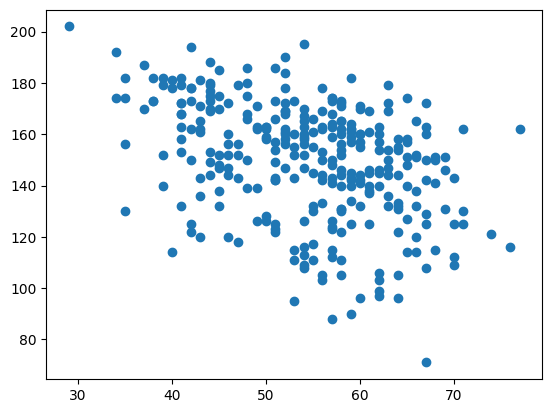

In [62]:
plt.scatter(df4['age'], df4['thalachh'], label='Data Points')
plt.plot(df4['age'], model.predict(x), color='blue', label='Regression Line')
plt.xlabel('age')
plt.ylabel('thalachh')
plt.title('Relationship between Age of Maximum Heart Rate Achieved')
plt.legend()
plt.show()